In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing 

import cv2
import matplotlib.pyplot as plt

from skimage.morphology import extrema
from skimage.color import rgb2gray

# Load cell data

In [2]:
urothelial_cells = pd.read_pickle("urothelial_cell_toy_data.pkl")
images=np.transpose(urothelial_cells["X"].numpy()*255,(0,2,3,1)).astype(np.uint8)
labels=urothelial_cells["y"]

(-0.5, 255.5, 255.5, -0.5)

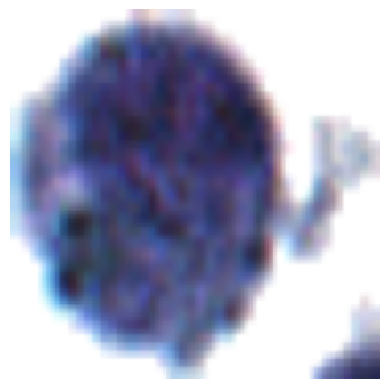

In [59]:
idx_image=10
img=images[idx_image]
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [36]:
img2.shape # (height,width,color channel)

(256, 256, 3)

In [60]:
# Converts the dimension into Kx3 matrix
# K = H x W
vector_img = img.reshape((-1,3))
# Converts float type
vector_img = np.float32(vector_img)

In [61]:
import pandas as pd
pixel_colors=pd.DataFrame(vector_img,columns=["Red","Green","Blue"])#.shape

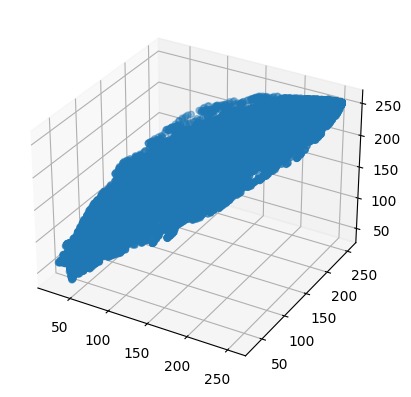

In [62]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(pixel_colors["Red"],pixel_colors["Green"],pixel_colors["Blue"])

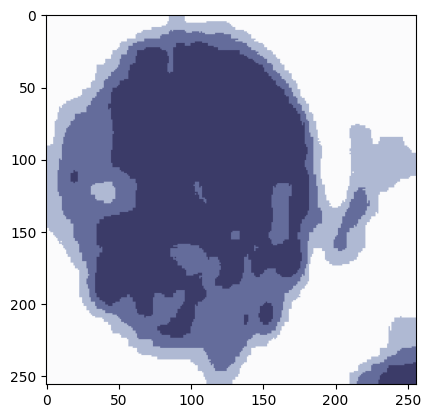

In [63]:
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as your desired value
#also random centres are initially choosed for k-means clustering
k = 4
retval, labels, centers = cv2.kmeans(vector_img, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))

plt.imshow(segmented_image)

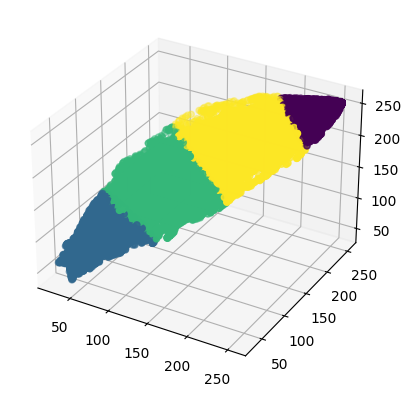

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(pixel_colors["Red"],pixel_colors["Green"],pixel_colors["Blue"],c=labels)

In [65]:
segmented_image_intensity=cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

In [66]:
cluster_intensities=sorted(np.unique(segmented_image_intensity))

In [67]:
nuclear_intensity=cluster_intensities[0]
cytoplasm_intensity=cluster_intensities[1:-1]
background_intensity=cluster_intensities[-1]

In [68]:
nuclear_mask=(segmented_image_intensity==nuclear_intensity)
background_mask=(segmented_image_intensity==background_intensity)
cytoplasm_mask=np.logical_and(segmented_image_intensity!=nuclear_intensity,segmented_image_intensity!=background_intensity)

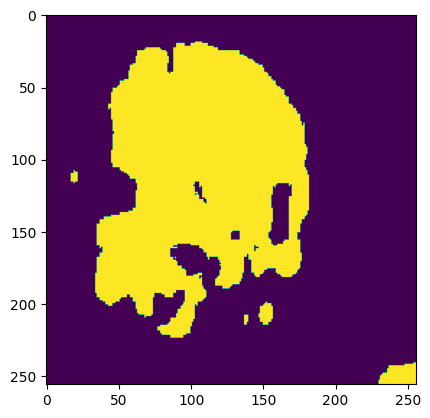

In [69]:
plt.imshow(nuclear_mask)

(-0.5, 255.5, 255.5, -0.5)

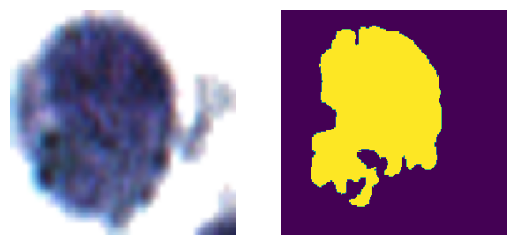

In [71]:
from scipy.ndimage import label
from scipy.ndimage import binary_fill_holes
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

nuclear_mask_modified=binary_fill_holes(label(nuclear_mask)[0]==1)
plt.subplot(1,2,2)
plt.imshow(nuclear_mask_modified)
plt.axis('off')


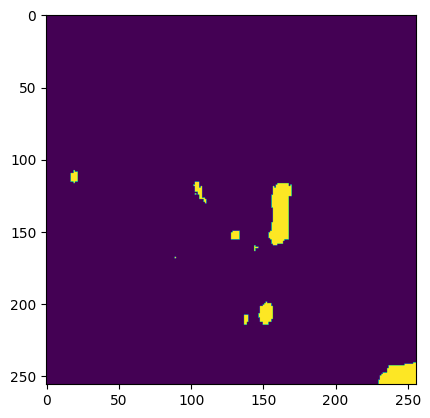

In [74]:
plt.imshow(np.abs(nuclear_mask_modified.astype(int)-nuclear_mask.astype(int)))

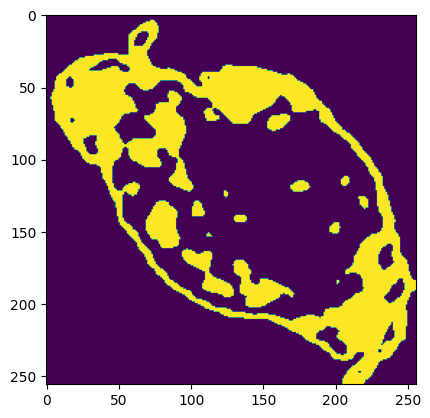

In [18]:
plt.imshow(cytoplasm_mask)

In [32]:
labels[idx_image]

array([3], dtype=int32)

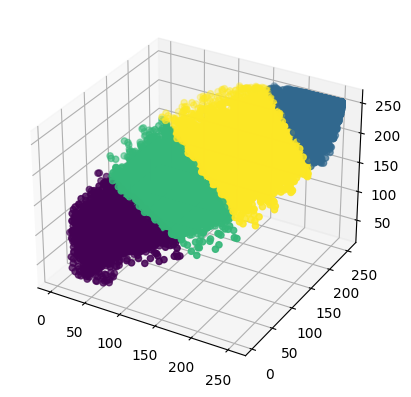

In [34]:
print(classification_report(Y_val.numpy().flatten(),y_val_pred_lbls.flatten()))

In [ ]:
nucleus_pred=(y_val_pred_lbls.reshape(y_val_pred_lbls.shape[0],-1)==1).sum(axis=1)
cytoplasm_pred=(y_val_pred_lbls.reshape(y_val_pred_lbls.shape[0],-1)==2).sum(axis=1)
nc_ratio_pred=nucleus_pred/(nucleus_pred+cytoplasm_pred)

In [ ]:
nucleus_true=(Y_val.reshape(Y_val.shape[0],-1)==1).sum(axis=1)
cytoplasm_true=(Y_val.reshape(Y_val.shape[0],-1)==2).sum(axis=1)
nc_ratio_true=nucleus_true/(nucleus_true+cytoplasm_true)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(nc_ratio_pred,nc_ratio_true)
plt.plot([0,1],[0,1],ls="--")
plt.xlabel("Predicted NC")
plt.ylabel("True NC")
sns.despine()